In [1]:
import pandas as pd
import numpy as np

!pip install --force https://github.com/chengs/tqdm/archive/colab.zip
from tqdm import tqdm_notebook as tqdm

     - 624kB 24.7MB/s
  Stored in directory: /tmp/pip-ephem-wheel-cache-sag615gp/wheels/41/18/ee/d5dd158441b27965855b1bbae03fa2d8a91fe645c01b419896
Successfully built tqdm
  Found existing installation: tqdm 4.28.1
    Uninstalling tqdm-4.28.1:
      Successfully uninstalled tqdm-4.28.1


In [0]:
def Get_score(Y_pred,Y_true):
    '''Calculate the Spearmann"s correlation coefficient'''
    Y_pred = np.squeeze(Y_pred)
    Y_true = np.squeeze(Y_true)
    if Y_pred.shape != Y_true.shape:
        print('Input shapes don\'t match!')
    else:
        if len(Y_pred.shape) == 1:
            Res = pd.DataFrame({'Y_true':Y_true,'Y_pred':Y_pred})
            score_mat = Res[['Y_true','Y_pred']].corr(method='spearman',min_periods=1)
            print('The Spearman\'s correlation coefficient is: %.3f' % score_mat.iloc[1][0])
        else:
            for ii in range(Y_pred.shape[1]):
                Get_score(Y_pred[:,ii],Y_true[:,ii])

In [3]:
import time
from google.colab import drive
drive.mount('/content/drive/')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [5]:
!ls "/content/drive/My Drive/CA684_Assignment_Data/dev-set"

C3D		dev-set_ground-truth.csv    HMP  InceptionV3  ORB
ColorHistogram	dev-set_video-captions.txt  HOG  LBP	      README.txt


In [6]:
ground_truth_file = '/content/drive/My Drive/CA684_Assignment_Data/dev-set/dev-set_ground-truth.csv'
ground_truth = pd.read_csv(ground_truth_file)
ground_truth.head()

,video,short-term_memorability,nb_short-term_annotations,long-term_memorability,nb_long-term_annotations
0,video3.webm,0.924,34,0.846,13
1,video4.webm,0.923,33,0.667,12
2,video6.webm,0.863,33,0.700,10
3,video8.webm,0.922,33,0.818,11
4,video10.webm,0.950,34,0.900,10


In [7]:
ground_truth.describe()

,short-term_memorability,nb_short-term_annotations,long-term_memorability,nb_long-term_annotations
count,6000.000000,6000.000000,6000.000000,6000.000000
mean,0.860243,36.291500,0.778942,12.764667
std,0.080655,8.356285,0.144692,3.544815
min,0.388000,30.000000,0.000000,9.000000
25%,0.811000,33.000000,0.700000,10.000000
50%,0.867000,34.000000,0.800000,12.000000
75%,0.923000,34.000000,0.900000,14.000000
max,0.989000,100.000000,1.000000,40.000000


In [8]:
!pip install pyprind

In [9]:
from keras import Sequential
from keras import layers
from keras import regularizers
from string import punctuation
import pyprind
from collections import Counter
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(1)

In [0]:
# load labels and captions
def read_caps(fname):
    """Load the captions into a dataframe"""
    vn = []
    cap = []
    df = pd.DataFrame();
    with open(fname) as f:
        for line in f:
            pairs = line.split()
            vn.append(pairs[0])
            cap.append(pairs[1])
        df['video']=vn
        df['caption']=cap
    return df


# load the captions
cap_path = '/content/drive/My Drive/CA684_Assignment_Data/dev-set/dev-set_video-captions.txt'
df_cap=read_caps(cap_path)

# load the ground truth values
ground_truth_file = '/content/drive/My Drive/CA684_Assignment_Data/dev-set/dev-set_ground-truth.csv'
labels = pd.read_csv(ground_truth_file)

In [0]:
print(df_cap)
print(labels)

In [14]:
counts = Counter()
# setup prograss tracker
pbar = pyprind.ProgBar(len(df_cap['caption']), title='Counting word occurrences')
for i, cap in enumerate(df_cap['caption']):
    # replace punctuations with space
    # convert words to lower case 
    text = ''.join([c if c not in punctuation else ' ' for c in cap]).lower()
    df_cap.loc[i,'caption'] = text
    pbar.update()
    counts.update(text.split())

Counting word occurrences
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:04


In [15]:
print(counts)
print(len(counts))

Counter({'in': 2105, 'the': 1835, 'on': 1724, 'and': 1444, 'a': 1181, 'with': 996, 'woman': 899, 'of': 836, 'at': 762, 'young': 724, 'man': 559, 'slow': 495, 'motion': 452, 'to': 416, 'couple': 318, 'sitting': 304, 'girl': 291, 'happy': 279, 'beach': 270, 'park': 256, 'up': 255, 'walking': 237, 'close': 230, 'camera': 230, 'her': 219, 'using': 218, 'shot': 215, 'smiling': 198, 'looking': 195, 'two': 191, 'by': 189, 'people': 188, 'from': 188, 'tablet': 184, 'is': 181, 'water': 171, 'through': 156, 'female': 150, 'computer': 149, 'view': 149, 'laptop': 139, 'playing': 137, 'sunset': 137, 'beautiful': 133, 'videoblocks': 131, 'his': 131, 'running': 130, 'talking': 129, 'city': 128, 'working': 127, 'eating': 126, 'little': 126, 'family': 125, 'mother': 124, 'background': 122, 'home': 122, 'standing': 121, 'for': 115, 'phone': 115, 'or': 114, 'sea': 113, 'national': 112, 'african': 111, 'attractive': 111, 'tree': 107, 'snow': 103, 'their': 102, 'drinking': 102, 'hands': 102, 'steadicamof':

In [17]:
df_cap.head()

,video,caption
0,video3.webm,blonde woman is massaged tilt down
1,video4.webm,roulette table spinning with ball in closeup shot
2,video6.webm,khr gangsters
3,video8.webm,medical helicopter hovers at airport
4,video10.webm,couple relaxing on picnic crane shot


In [18]:
# build the word index
len_token = len(counts)
tokenizer = Tokenizer(num_words=len_token)
print(len_token)

5191


In [0]:
tokenizer.fit_on_texts(list(df_cap.caption.values)) #fit a list of captions to the tokenizer
#the tokenizer vectorizes a text corpus, by turning each text into either a sequence of integers 

In [20]:
print(len(tokenizer.word_index))

5191


In [0]:
one_hot_res = tokenizer.texts_to_matrix(list(df_cap.caption.values),mode='binary')
sequences = tokenizer.texts_to_sequences(list(df_cap.caption.values))

In [22]:
#Just to visualise some stuff in sequences and counts
print(sequences[0]) # prints location of words from caption 0 'blonde woman is massaged tilt down'
print(counts['blonde']) # no. of occurences of 'blonde'
n=3
print('Least Common: ', counts.most_common()[:-n-1:-1])       # n least common elements
print('Most Common: ',counts.most_common(n))                     # n most common elements

[724, 7, 35, 884, 384, 91]
10
Least Common:  [('unknown', 1), ('handheldshowing', 1), ('longof', 1)]
Most Common:  [('in', 2105), ('the', 1835), ('on', 1724)]


In [0]:
# calculating max length
max_len = 50

In [24]:
print(sequences[0]) # length of 1st sequence

[724, 7, 35, 884, 384, 91]


In [25]:
X_seq = np.zeros((len(sequences),max_len))
for i in range(len(sequences)):
    n = len(sequences[i])
    if n==0:
        print(i)
    else:
        X_seq[i,-n:] = sequences[i]
X_seq.shape

(6000, 50)

In [26]:
print(X_seq[5999,:])

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  44.  71.
 243.   7.  26.  34.  39.   1. 872. 222.]


In [27]:
print(X_seq[0,:])

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0. 724.   7.  35. 884. 384.  91.]


In [0]:
Y = labels[['short-term_memorability','long-term_memorability']].values # targets
X = X_seq # sequences

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42) # random state for reproducability

In [31]:
print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('Y_train', Y_train.shape)
print('Y_test', Y_test.shape)

X_train (4800, 50)
X_test (1200, 50)
Y_train (4800, 2)
Y_test (1200, 2)


In [32]:
one_hot_res.shape

(6000, 5191)

Train on 4800 samples, validate on 1200 samples
Epoch 1/20
4800/4800 [==============================] - 1s 187us/step - loss: 0.0635 - acc: 0.3306 - val_loss: 0.0267 - val_acc: 0.2900
Epoch 2/20
4800/4800 [==============================] - 1s 124us/step - loss: 0.0261 - acc: 0.6119 - val_loss: 0.0172 - val_acc: 0.7100
Epoch 3/20
4800/4800 [==============================] - 1s 141us/step - loss: 0.0195 - acc: 0.6987 - val_loss: 0.0153 - val_acc: 0.7100
Epoch 4/20
4800/4800 [==============================] - 1s 143us/step - loss: 0.0168 - acc: 0.6985 - val_loss: 0.0146 - val_acc: 0.7100
Epoch 5/20
4800/4800 [==============================] - 1s 141us/step - loss: 0.0157 - acc: 0.7017 - val_loss: 0.0144 - val_acc: 0.7100
Epoch 6/20
4800/4800 [==============================] - 1s 143us/step - loss: 0.0150 - acc: 0.7031 - val_loss: 0.0142 - val_acc: 0.7100
Epoch 7/20
4800/4800 [==============================] - 1s 141us/step - loss: 0.0149 - acc: 0.7035 - val_loss: 0.0141 - val_acc: 0.7100


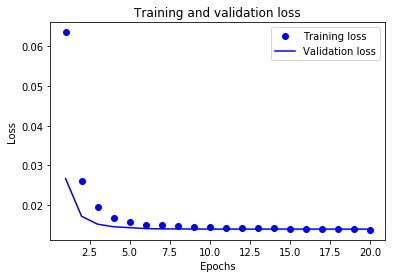

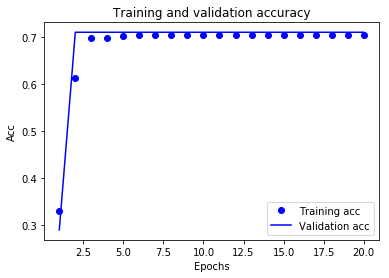

In [42]:
Y = labels[['short-term_memorability','long-term_memorability']].values
X = one_hot_res;
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

# add dropout
# add regularizers
model = Sequential()
model.add(layers.Dense(10,activation='relu',kernel_regularizer=regularizers.l2(0.001),input_shape=(len_token,)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10,activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(2,activation='sigmoid'))

# compile the model 
model.compile(optimizer='rmsprop',loss='mse',metrics=['accuracy'])

# training the model 
history = model.fit(X_train,Y_train,epochs=20,validation_data=(X_test,Y_test))

# visualizing the model
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure()
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [43]:
predictions = model.predict(X_test)
print(predictions.shape)

(1200, 2)


In [44]:
Get_score(predictions, Y_test)

The Spearman's correlation coefficient is: 0.305
The Spearman's correlation coefficient is: 0.161


In [0]:
final_results = pd.DataFrame({'video':ground_truth['video'][4800:],
                              'Short-term-pred':predictions[:,0],'Long-term-pred':predictions[:,1], 
                              'Short-term-true':ground_truth['short-term_memorability'][4800:], 
                              'Long-term-true':ground_truth['long-term_memorability'][4800:]})

final_results = final_results.reset_index(drop=True)

In [0]:
final_results.to_csv('/content/drive/My Drive/NN_results.csv')